In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv
/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv
/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv


# BRAZILIAN E-COMMERCE ANALYSIS AND PREDICTION

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
pd.set_option('display.max_columns',200)
import warnings
warnings.filterwarnings('ignore')

# Read all data

In [3]:
olist_customers=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv')
olist_geolocation=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv')
olist_item=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv')
olist_payment=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv')
olist_review=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv')
olist_orders=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')
olist_products=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv')
olist_seller=pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv')
product_category_name=pd.read_csv('/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv')

In [4]:
olist_customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [5]:
olist_geolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [6]:
olist_item.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [7]:
olist_payment.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [8]:
olist_review.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [9]:
olist_orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [10]:
olist_products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [11]:
olist_seller.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [12]:
product_category_name.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

# Merging All Data In One Table

In [13]:
df=pd.merge(olist_products,product_category_name,on='product_category_name',how='inner')
df=df.merge(olist_item,on='product_id',how='inner')

df

product_id product_category_name  \
0       1e9e8ef04dbcff4541ed26657ea517e5            perfumaria   
1       6a2fb4dd53d2cdb88e0432f1284a004c            perfumaria   
2       6a2fb4dd53d2cdb88e0432f1284a004c            perfumaria   
3       0d009643171aee696f4733340bc2fdd0            perfumaria   
4       0d009643171aee696f4733340bc2fdd0            perfumaria   
...                                  ...                   ...   
111018  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   
111019  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   
111020  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   
111021  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   
111022  1dceebcc5f23c02ea23e16d5bedca000     cds_dvds_musicais   

        product_name_lenght  product_description_lenght  product_photos_qty  \
0                      40.0                       287.0                 1.0   
1                      39.0                       346.0                 2.0   
2                      39.0                       346.0                 2.0   
3                      52.0                       150.0                 1.0   
4                      52.0                       150.0                 1.0   
...                     ...                         ...                 ...   
111018                 47.0                       117.0                 2.0   
111019                 47.0                       117.0                 2.0   
111020                 47.0                       117.0                 2.0   
111021                 47.0                       117.0                 2.0   
111022                 47.0                       117.0                 2.0   

        product_weight_g  product_length_cm  product_height_cm  \
0                  225.0               16.0               10.0   
1                  400.0               27.0                5.0   
2                  400.0               27.0                5.0   
3                  422.0               21.0               16.0   
4                  422.0               21.0               16.0   
...                  ...                ...                ...   
111018             550.0               35.0               15.0   
111019             550.0               35.0               15.0   
111020             550.0               35.0               15.0   
111021             550.0               35.0               15.0   
111022             550.0               35.0               15.0   

        product_width_cm product_category_name_english  \
0                   14.0                     perfumery   
1                   20.0                     perfumery   
2                   20.0                     perfumery   
3                   18.0                     perfumery   
4                   18.0                     perfumery   
...                  ...                           ...   
111018              25.0             cds_dvds_musicals   
111019              25.0             cds_dvds_musicals   
111020              25.0             cds_dvds_musicals   
111021              25.0             cds_dvds_musicals   
111022              25.0             cds_dvds_musicals   

                                order_id  order_item_id  \
0       e17e4f88e31525f7deef66779844ddce              1   
1       048cc42e03ca8d43c729adf6962cb348              1   
2       5fa78e91b5cb84b6a8ccc42733f95742              1   
3       24b1c4d88fdb7a2dc87f8ecc7d8f47f1              1   
4       7b13c77c64a9a956500cbf1a9a23798d              1   
...                                  ...            ...   
111018  7ed69fbc79fbda50e09caa9c127026e5              1   
111019  9c782cb7854e5dfa91927cfca8949eb8              1   
111020  cea54c1853c864ab36cea3ef732d7191              1   
111021  d4e8d3bb5e3673ed68ac154fe86de946              1   
111022  ffc4072a9ea36a3341efa25b69c449eb              1   

                               seller_id  shipping_limit_date   price  \
0       5670f4db

In [14]:
df=df.merge(olist_payment,on='order_id',how='inner')
df=df.merge(olist_orders,on='order_id',how='inner')
df=df.merge(olist_review,on='order_id',how='inner')
df=df.merge(olist_seller,on='seller_id',how='inner')
df

product_id      product_category_name  \
0       1e9e8ef04dbcff4541ed26657ea517e5                 perfumaria   
1       a035b83b3628decee6e3823924e0c10f                 perfumaria   
2       091107484dd7172f5dcfed173e4a960e                 perfumaria   
3       ccac9976bafbf7e587bd2c29302e2314                 perfumaria   
4       2eadf6089620e82047e4d24101dc6759                 perfumaria   
...                                  ...                        ...   
115604  e0714d4d2e52b1fbc8e851dac210333a                     flores   
115605  eaa3fffe22b0b5efe02db64ab9d3bf84  moveis_colchao_e_estofado   
115606  c3d08bab8c7c6d9cc1f6cfb5a465c80b  moveis_colchao_e_estofado   
115607  dc36a7859b743d8610a2bbbaea26ece9  moveis_colchao_e_estofado   
115608  dc36a7859b743d8610a2bbbaea26ece9  moveis_colchao_e_estofado   

        product_name_lenght  product_description_lenght  product_photos_qty  \
0                      40.0                       287.0                 1.0   
1                      53.0                      2235.0                 3.0   
2                      50.0                       260.0                 2.0   
3                      53.0                      2235.0                 3.0   
4                      44.0                       749.0                 1.0   
...                     ...                         ...                 ...   
115604                 56.0                      1650.0                 3.0   
115605                 30.0                      2073.0                 4.0   
115606                 32.0                      2073.0                 4.0   
115607                 29.0                      2073.0                 2.0   
115608                 29.0                      2073.0                 2.0   

        product_weight_g  product_length_cm  product_height_cm  \
0                  225.0               16.0               10.0   
1                 1450.0               20.0               25.0   
2                  183.0               16.0                8.0   
3                 1500.0               20.0               25.0   
4                  500.0               16.0               14.0   
...                  ...                ...                ...   
115604             550.0               16.0               25.0   
115605            1850.0               41.0               21.0   
115606            1950.0               41.0               21.0   
115607            2500.0               41.0               21.0   
115608            2500.0               41.0               21.0   

        product_width_cm      product_category_name_english  \
0                   14.0                          perfumery   
1                   20.0                          perfumery   
2                   13.0                          perfumery   
3                   20.0                          perfumery   
4                   14.0                          perfumery   
...                  ...                                ...   
115604              16.0                            flowers   
115605              21.0  furniture_mattress_and_upholstery   
115606              21.0  furniture_mattress_and_upholstery   
115607              21.0  furniture_mattress_and_upholstery   
115608              21.0  furniture_mattress_and_upholstery   

                                order_id  order_item_id  \
0       e17e4f88e31525f7deef66779844ddce              1   
1       b18cb761efbe70da4838435a349abd07              1   
2       a7708ffa8966514c098d15e1abfa6417              1   
3       206d1a13596872a713dba14504fdf699              1   
4       f8bb4d404d187c79b86ccf852dfa345e              1   
...                                  ...            ...   
115604  df832acdcfc236969ab361d4597e6e0a              1   
115605  440fd902b617080eeb9463a65ffae07a              1   
115606  9edafa4c6dbc4a9dd05637c84bf96605              1   
115607  37a7476e58da10721b5e55ba4be6807d              1   
115608  37a7476e58da10721b5e5

In [15]:
df.head()

product_id product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5            perfumaria   
1  a035b83b3628decee6e3823924e0c10f            perfumaria   
2  091107484dd7172f5dcfed173e4a960e            perfumaria   
3  ccac9976bafbf7e587bd2c29302e2314            perfumaria   
4  2eadf6089620e82047e4d24101dc6759            perfumaria   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 53.0                      2235.0                 3.0   
2                 50.0                       260.0                 2.0   
3                 53.0                      2235.0                 3.0   
4                 44.0                       749.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1            1450.0               20.0               25.0              20.0   
2             183.0               16.0                8.0              13.0   
3            1500.0               20.0               25.0              20.0   
4             500.0               16.0               14.0              14.0   

  product_category_name_english                          order_id  \
0                     perfumery  e17e4f88e31525f7deef66779844ddce   
1                     perfumery  b18cb761efbe70da4838435a349abd07   
2                     perfumery  a7708ffa8966514c098d15e1abfa6417   
3                     perfumery  206d1a13596872a713dba14504fdf699   
4                     perfumery  f8bb4d404d187c79b86ccf852dfa345e   

   order_item_id                         seller_id  shipping_limit_date  \
0              1  5670f4db5b62c43d542e1b2d56b0cf7c  2018-04-30 17:33:54   
1              1  5670f4db5b62c43d542e1b2d56b0cf7c  2018-07-06 19:31:03   
2              1  5670f4db5b62c43d542e1b2d56b0cf7c  2018-04-27 19:31:35   
3              1  5670f4db5b62c43d542e1b2d56b0cf7c  2018-08-01 16:35:17   
4              1  5670f4db5b62c43d542e1b2d56b0cf7c  2018-06-20 21:58:24   

    price  freight_value  payment_sequential payment_type  \
0   10.91           7.39                   1   debit_card   
1  268.38          21.07                   1  credit_card   
2    7.65          10.55                   1  credit_card   
3  268.38          18.07                   1  credit_card   
4   16.88           7.39                   1  credit_card   

   payment_installments  payment_value                       customer_id  \
0                     1          18.30  f8a3e963a310aa58b60a5b1fed5bceb5   
1                    10         289.45  9ff6d1a05ecfe2d907adac11a2e2bfe9   
2                     2          57.75  360782688ff472f1adbd47a85861751e   
3                     8         286.45  58c5eb8e7844d1ecd85128e663f49e04   
4                     1          24.27  52a9800a9341855f5ebf8b0b8b1fd906   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2018-04-24 16:16:53  2018-04-24 19:04:19   
1    delivered      2018-07-04 18:39:28  2018-07-05 16:33:14   
2    delivered      2018-04-23 19:03:35  2018-04-24 19:17:45   
3    delivered      2018-07-29 20:50:22  2018-07-30 18:31:13   
4    delivered      2018-06-18 21:46:34  2018-06-18 21:58:24   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2018-04-25 17:01:00           2018-04-27 16:42:17   
1          2018-07-05 13:21:00           2018-07-10 22:34:39   
2          2018-04-24 16:22:36           2018-04-25 23:02:39   
3          2018-08-01 15:24:00           2018-08-06 18:36:46   
4          2018-06-19 15:10:00           2018-06-20 19:22:15   

  order_estimated_delivery_date                         review_id  \
0           2018-05-09 00:00:00  d71da8fd8c6e3adef26be965f065b8a1   
1           2018-07-27 00:00:00  0f0f85749cb82321d902e390a9c33694   
2           2018-05-15 00:00:00  39489f8518181b82cb86ce264e1ccc55   
3 

# Data Preprocessing

In [16]:
df.isna().sum()

product_id                            0
product_category_name                 0
product_name_lenght                   0
product_description_lenght            0
product_photos_qty                    0
product_weight_g                      1
product_length_cm                     1
product_height_cm                     1
product_width_cm                      1
product_category_name_english         0
order_id                              0
order_item_id                         0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195


# Drop unnecessary columns

In [17]:
df.drop(['review_comment_title','review_comment_message','review_id'],axis=1,inplace=True)

In [18]:
df

product_id      product_category_name  \
0       1e9e8ef04dbcff4541ed26657ea517e5                 perfumaria   
1       a035b83b3628decee6e3823924e0c10f                 perfumaria   
2       091107484dd7172f5dcfed173e4a960e                 perfumaria   
3       ccac9976bafbf7e587bd2c29302e2314                 perfumaria   
4       2eadf6089620e82047e4d24101dc6759                 perfumaria   
...                                  ...                        ...   
115604  e0714d4d2e52b1fbc8e851dac210333a                     flores   
115605  eaa3fffe22b0b5efe02db64ab9d3bf84  moveis_colchao_e_estofado   
115606  c3d08bab8c7c6d9cc1f6cfb5a465c80b  moveis_colchao_e_estofado   
115607  dc36a7859b743d8610a2bbbaea26ece9  moveis_colchao_e_estofado   
115608  dc36a7859b743d8610a2bbbaea26ece9  moveis_colchao_e_estofado   

        product_name_lenght  product_description_lenght  product_photos_qty  \
0                      40.0                       287.0                 1.0   
1                      53.0                      2235.0                 3.0   
2                      50.0                       260.0                 2.0   
3                      53.0                      2235.0                 3.0   
4                      44.0                       749.0                 1.0   
...                     ...                         ...                 ...   
115604                 56.0                      1650.0                 3.0   
115605                 30.0                      2073.0                 4.0   
115606                 32.0                      2073.0                 4.0   
115607                 29.0                      2073.0                 2.0   
115608                 29.0                      2073.0                 2.0   

        product_weight_g  product_length_cm  product_height_cm  \
0                  225.0               16.0               10.0   
1                 1450.0               20.0               25.0   
2                  183.0               16.0                8.0   
3                 1500.0               20.0               25.0   
4                  500.0               16.0               14.0   
...                  ...                ...                ...   
115604             550.0               16.0               25.0   
115605            1850.0               41.0               21.0   
115606            1950.0               41.0               21.0   
115607            2500.0               41.0               21.0   
115608            2500.0               41.0               21.0   

        product_width_cm      product_category_name_english  \
0                   14.0                          perfumery   
1                   20.0                          perfumery   
2                   13.0                          perfumery   
3                   20.0                          perfumery   
4                   14.0                          perfumery   
...                  ...                                ...   
115604              16.0                            flowers   
115605              21.0  furniture_mattress_and_upholstery   
115606              21.0  furniture_mattress_and_upholstery   
115607              21.0  furniture_mattress_and_upholstery   
115608              21.0  furniture_mattress_and_upholstery   

                                order_id  order_item_id  \
0       e17e4f88e31525f7deef66779844ddce              1   
1       b18cb761efbe70da4838435a349abd07              1   
2       a7708ffa8966514c098d15e1abfa6417              1   
3       206d1a13596872a713dba14504fdf699              1   
4       f8bb4d404d187c79b86ccf852dfa345e              1   
...                                  ...            ...   
115604  df832acdcfc236969ab361d4597e6e0a              1   
115605  440fd902b617080eeb9463a65ffae07a              1   
115606  9edafa4c6dbc4a9dd05637c84bf96605              1   
115607  37a7476e58da10721b5e55ba4be6807d              1   
115608  37a7476e58da10721b5e5

In [19]:
df.isna().sum()

product_id                          0
product_category_name               0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    1
product_length_cm                   1
product_height_cm                   1
product_width_cm                    1
product_category_name_english       0
order_id                            0
order_item_id                       0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1195
order_delivered_customer_date    2400
order_estima

# Drop Missing Values

In [20]:
df=df.dropna()

In [21]:
df.isna().sum()

product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
order_id                         0
order_item_id                    0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
review_score                     0
review_creation_date

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113193 entries, 0 to 115608
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   product_id                     113193 non-null  object 
 1   product_category_name          113193 non-null  object 
 2   product_name_lenght            113193 non-null  float64
 3   product_description_lenght     113193 non-null  float64
 4   product_photos_qty             113193 non-null  float64
 5   product_weight_g               113193 non-null  float64
 6   product_length_cm              113193 non-null  float64
 7   product_height_cm              113193 non-null  float64
 8   product_width_cm               113193 non-null  float64
 9   product_category_name_english  113193 non-null  object 
 10  order_id                       113193 non-null  object 
 11  order_item_id                  113193 non-null  int64  
 12  seller_id                      1131

# Conver date columns to datetime type

In [23]:
columns_to_convert = [
    'shipping_limit_date',
    'order_purchase_timestamp',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'review_creation_date',
    'review_answer_timestamp'
]

# Convert columns to datetime with day, month, and year
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_datetime)

# Verify the updated data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113193 entries, 0 to 115608
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_id                     113193 non-null  object        
 1   product_category_name          113193 non-null  object        
 2   product_name_lenght            113193 non-null  float64       
 3   product_description_lenght     113193 non-null  float64       
 4   product_photos_qty             113193 non-null  float64       
 5   product_weight_g               113193 non-null  float64       
 6   product_length_cm              113193 non-null  float64       
 7   product_height_cm              113193 non-null  float64       
 8   product_width_cm               113193 non-null  float64       
 9   product_category_name_english  113193 non-null  object        
 10  order_id                       113193 non-null  object        
 11  order

In [24]:
df.head()

product_id product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5            perfumaria   
1  a035b83b3628decee6e3823924e0c10f            perfumaria   
2  091107484dd7172f5dcfed173e4a960e            perfumaria   
3  ccac9976bafbf7e587bd2c29302e2314            perfumaria   
4  2eadf6089620e82047e4d24101dc6759            perfumaria   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 53.0                      2235.0                 3.0   
2                 50.0                       260.0                 2.0   
3                 53.0                      2235.0                 3.0   
4                 44.0                       749.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1            1450.0               20.0               25.0              20.0   
2             183.0               16.0                8.0              13.0   
3            1500.0               20.0               25.0              20.0   
4             500.0               16.0               14.0              14.0   

  product_category_name_english                          order_id  \
0                     perfumery  e17e4f88e31525f7deef66779844ddce   
1                     perfumery  b18cb761efbe70da4838435a349abd07   
2                     perfumery  a7708ffa8966514c098d15e1abfa6417   
3                     perfumery  206d1a13596872a713dba14504fdf699   
4                     perfumery  f8bb4d404d187c79b86ccf852dfa345e   

   order_item_id                         seller_id shipping_limit_date  \
0              1  5670f4db5b62c43d542e1b2d56b0cf7c 2018-04-30 17:33:54   
1              1  5670f4db5b62c43d542e1b2d56b0cf7c 2018-07-06 19:31:03   
2              1  5670f4db5b62c43d542e1b2d56b0cf7c 2018-04-27 19:31:35   
3              1  5670f4db5b62c43d542e1b2d56b0cf7c 2018-08-01 16:35:17   
4              1  5670f4db5b62c43d542e1b2d56b0cf7c 2018-06-20 21:58:24   

    price  freight_value  payment_sequential payment_type  \
0   10.91           7.39                   1   debit_card   
1  268.38          21.07                   1  credit_card   
2    7.65          10.55                   1  credit_card   
3  268.38          18.07                   1  credit_card   
4   16.88           7.39                   1  credit_card   

   payment_installments  payment_value                       customer_id  \
0                     1          18.30  f8a3e963a310aa58b60a5b1fed5bceb5   
1                    10         289.45  9ff6d1a05ecfe2d907adac11a2e2bfe9   
2                     2          57.75  360782688ff472f1adbd47a85861751e   
3                     8         286.45  58c5eb8e7844d1ecd85128e663f49e04   
4                     1          24.27  52a9800a9341855f5ebf8b0b8b1fd906   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2018-04-24 16:16:53  2018-04-24 19:04:19   
1    delivered      2018-07-04 18:39:28  2018-07-05 16:33:14   
2    delivered      2018-04-23 19:03:35  2018-04-24 19:17:45   
3    delivered      2018-07-29 20:50:22  2018-07-30 18:31:13   
4    delivered      2018-06-18 21:46:34  2018-06-18 21:58:24   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2018-04-25 17:01:00           2018-04-27 16:42:17   
1          2018-07-05 13:21:00           2018-07-10 22:34:39   
2          2018-04-24 16:22:36           2018-04-25 23:02:39   
3          2018-08-01 15:24:00           2018-08-06 18:36:46   
4          2018-06-19 15:10:00           2018-06-20 19:22:15   

  order_estimated_delivery_date  review_score review_creation_date  \
0                    2018-05-09             5           2018-04-28   
1                    2018-07-27             4           2018-07-11   
2                    2018-05-15             5           2018-04-26   
3   

In [25]:
df.duplicated().sum()

0

In [26]:
df.drop(['product_id','product_category_name','order_id','seller_id','customer_id'],axis=1,inplace=True)

In [27]:
df.head()

product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 53.0                      2235.0                 3.0   
2                 50.0                       260.0                 2.0   
3                 53.0                      2235.0                 3.0   
4                 44.0                       749.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1            1450.0               20.0               25.0              20.0   
2             183.0               16.0                8.0              13.0   
3            1500.0               20.0               25.0              20.0   
4             500.0               16.0               14.0              14.0   

  product_category_name_english  order_item_id shipping_limit_date   price  \
0                     perfumery              1 2018-04-30 17:33:54   10.91   
1                     perfumery              1 2018-07-06 19:31:03  268.38   
2                     perfumery              1 2018-04-27 19:31:35    7.65   
3                     perfumery              1 2018-08-01 16:35:17  268.38   
4                     perfumery              1 2018-06-20 21:58:24   16.88   

   freight_value  payment_sequential payment_type  payment_installments  \
0           7.39                   1   debit_card                     1   
1          21.07                   1  credit_card                    10   
2          10.55                   1  credit_card                     2   
3          18.07                   1  credit_card                     8   
4           7.39                   1  credit_card                     1   

   payment_value order_status order_purchase_timestamp    order_approved_at  \
0          18.30    delivered      2018-04-24 16:16:53  2018-04-24 19:04:19   
1         289.45    delivered      2018-07-04 18:39:28  2018-07-05 16:33:14   
2          57.75    delivered      2018-04-23 19:03:35  2018-04-24 19:17:45   
3         286.45    delivered      2018-07-29 20:50:22  2018-07-30 18:31:13   
4          24.27    delivered      2018-06-18 21:46:34  2018-06-18 21:58:24   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2018-04-25 17:01:00           2018-04-27 16:42:17   
1          2018-07-05 13:21:00           2018-07-10 22:34:39   
2          2018-04-24 16:22:36           2018-04-25 23:02:39   
3          2018-08-01 15:24:00           2018-08-06 18:36:46   
4          2018-06-19 15:10:00           2018-06-20 19:22:15   

  order_estimated_delivery_date  review_score review_creation_date  \
0                    2018-05-09             5           2018-04-28   
1                    2018-07-27             4           2018-07-11   
2                    2018-05-15             5           2018-04-26   
3                    2018-08-15             3           2018-08-07   
4                    2018-06-28             4           2018-06-21   

  review_answer_timestamp  seller_zip_code_prefix seller_city seller_state  
0     2018-05-04 00:55:02                    3694   sao paulo           SP  
1     2018-07-15 21:32:04                    3694   sao paulo           SP  
2     2018-04-30 21:15:06                    3694   sao paulo           SP  
3     2018-08-07 22:56:38                    3694   sao paulo           SP  
4     2018-06-22 12:12:26                    3694   sao paulo           SP

In [28]:
df.to_csv('brazilian-ecommerce_data.csv',index=False)

# Exploratory Data Analysis(EDA)

<Axes: ylabel='count'>

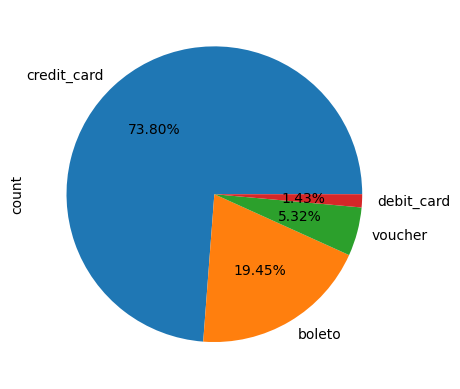

In [29]:
df['payment_type'].value_counts().plot(kind='pie',autopct='%1.2f%%')

**74% from customers pay by credit card**

<Axes: ylabel='count'>

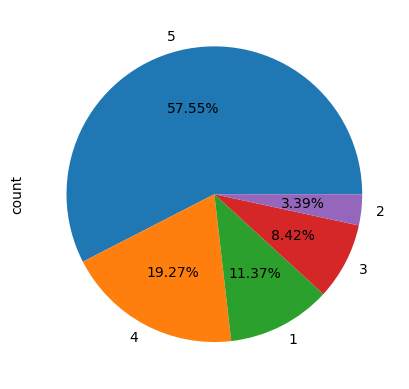

In [30]:
df['review_score'].value_counts().plot(kind='pie',autopct='%1.2f%%')

**about 77% of reviews score are 4&5 stars and about 15% of reviews score are 1&2 stars.
so that is a good indicator for good service**

In [31]:
df.groupby('product_category_name_english')['price'].sum().reset_index().sort_values(by='price',ascending=False)

product_category_name_english       price
43                 health_beauty  1267072.48
70                 watches_gifts  1207355.40
7                 bed_bath_table  1081890.33
65                sports_leisure   989555.18
15         computers_accessories   922482.79
..                           ...         ...
35                       flowers     1000.24
46                home_comfort_2      734.47
11             cds_dvds_musicals      730.00
29     fashion_childrens_clothes      519.95
61         security_and_services      283.29

[71 rows x 2 columns]

In [32]:
# Group the data by 'product_category' and calculate the sum of 'sales'
grouped_data=df.groupby('product_category_name_english')['price'].sum().reset_index().sort_values(by='price',ascending=False)
# Plot the grouped data using Plotly Express
fig = px.bar(grouped_data, x='product_category_name_english', y='price', title='Total Sales by Category')
fig.show()

**the highest sales category is health beauty and the lowest is security and services**

In [33]:
# Group the data by 'seller_city' and Average of 'freight_value'
grouped_data=df.groupby('seller_city')['freight_value'].mean().reset_index().sort_values(by='freight_value',ascending=False)
# Plot the grouped data using Plotly Express
fig = px.bar(grouped_data, x='seller_city', y='freight_value', title='Average Freight Value by City')
fig.show()

In [34]:
# Group the data by 'seller_city' and calculate the sum of 'sales'
grouped_data=df.groupby('seller_city')['price'].sum().reset_index().sort_values(by='price',ascending=False)
# Plot the grouped data using Plotly Express
fig = px.bar(grouped_data, x='seller_city', y='price', title='Total Sales by City')
fig.show()

# the highest city for sales is sao paulo and it is the best city for sales

In [35]:
# Group the data by 'seller_state' and calculate the sum of 'sales'
grouped_data=df.groupby('seller_state')['price'].sum().reset_index().sort_values(by='price',ascending=False)
# Plot the grouped data using Plotly Express
fig = px.bar(grouped_data, x='seller_state', y='price', title='Total Sales by City')
# Update the layout to change the figure size
fig.update_layout(width=800, height=600)
fig.show()

In [36]:
# Group the data by 'product_category' and Average of 'review_score'
grouped_data = df.groupby('product_category_name_english')['review_score'].mean().reset_index().sort_values(by='review_score', ascending=False)

# Plot the grouped data using Plotly Express
fig = px.bar(grouped_data, x='product_category_name_english', y='review_score', title='Average Review Score for Product Category')

# Update the layout to change the figure size
fig.update_layout(width=800, height=600)
fig.show()

In [37]:
df.head()

product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 53.0                      2235.0                 3.0   
2                 50.0                       260.0                 2.0   
3                 53.0                      2235.0                 3.0   
4                 44.0                       749.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1            1450.0               20.0               25.0              20.0   
2             183.0               16.0                8.0              13.0   
3            1500.0               20.0               25.0              20.0   
4             500.0               16.0               14.0              14.0   

  product_category_name_english  order_item_id shipping_limit_date   price  \
0                     perfumery              1 2018-04-30 17:33:54   10.91   
1                     perfumery              1 2018-07-06 19:31:03  268.38   
2                     perfumery              1 2018-04-27 19:31:35    7.65   
3                     perfumery              1 2018-08-01 16:35:17  268.38   
4                     perfumery              1 2018-06-20 21:58:24   16.88   

   freight_value  payment_sequential payment_type  payment_installments  \
0           7.39                   1   debit_card                     1   
1          21.07                   1  credit_card                    10   
2          10.55                   1  credit_card                     2   
3          18.07                   1  credit_card                     8   
4           7.39                   1  credit_card                     1   

   payment_value order_status order_purchase_timestamp    order_approved_at  \
0          18.30    delivered      2018-04-24 16:16:53  2018-04-24 19:04:19   
1         289.45    delivered      2018-07-04 18:39:28  2018-07-05 16:33:14   
2          57.75    delivered      2018-04-23 19:03:35  2018-04-24 19:17:45   
3         286.45    delivered      2018-07-29 20:50:22  2018-07-30 18:31:13   
4          24.27    delivered      2018-06-18 21:46:34  2018-06-18 21:58:24   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2018-04-25 17:01:00           2018-04-27 16:42:17   
1          2018-07-05 13:21:00           2018-07-10 22:34:39   
2          2018-04-24 16:22:36           2018-04-25 23:02:39   
3          2018-08-01 15:24:00           2018-08-06 18:36:46   
4          2018-06-19 15:10:00           2018-06-20 19:22:15   

  order_estimated_delivery_date  review_score review_creation_date  \
0                    2018-05-09             5           2018-04-28   
1                    2018-07-27             4           2018-07-11   
2                    2018-05-15             5           2018-04-26   
3                    2018-08-15             3           2018-08-07   
4                    2018-06-28             4           2018-06-21   

  review_answer_timestamp  seller_zip_code_prefix seller_city seller_state  
0     2018-05-04 00:55:02                    3694   sao paulo           SP  
1     2018-07-15 21:32:04                    3694   sao paulo           SP  
2     2018-04-30 21:15:06                    3694   sao paulo           SP  
3     2018-08-07 22:56:38                    3694   sao paulo           SP  
4     2018-06-22 12:12:26                    3694   sao paulo           SP

# Top 10 best sellers

In [38]:
# Group the data by 'product_category' and calculate the sum of 'sales'
grouped_data=df.groupby('seller_zip_code_prefix')['payment_value'].sum().reset_index().sort_values(by='payment_value',ascending=False)
grouped_data.head(10)

seller_zip_code_prefix  payment_value
1055                   14940     1045314.51
679                     8577      530008.19
193                     3204      308309.44
1060                   15025      302533.67
930                    13405      282162.30
1563                   42738      280509.23
1049                   14840      259994.39
428                     4782      235836.31
882                    13170      203105.02
514                     5849      176413.91

In [39]:
df['product_volume_cm3'] = df['product_length_cm'] * df['product_height_cm'] * df['product_width_cm']

In [40]:
df.head()

product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 53.0                      2235.0                 3.0   
2                 50.0                       260.0                 2.0   
3                 53.0                      2235.0                 3.0   
4                 44.0                       749.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1            1450.0               20.0               25.0              20.0   
2             183.0               16.0                8.0              13.0   
3            1500.0               20.0               25.0              20.0   
4             500.0               16.0               14.0              14.0   

  product_category_name_english  order_item_id shipping_limit_date   price  \
0                     perfumery              1 2018-04-30 17:33:54   10.91   
1                     perfumery              1 2018-07-06 19:31:03  268.38   
2                     perfumery              1 2018-04-27 19:31:35    7.65   
3                     perfumery              1 2018-08-01 16:35:17  268.38   
4                     perfumery              1 2018-06-20 21:58:24   16.88   

   freight_value  payment_sequential payment_type  payment_installments  \
0           7.39                   1   debit_card                     1   
1          21.07                   1  credit_card                    10   
2          10.55                   1  credit_card                     2   
3          18.07                   1  credit_card                     8   
4           7.39                   1  credit_card                     1   

   payment_value order_status order_purchase_timestamp    order_approved_at  \
0          18.30    delivered      2018-04-24 16:16:53  2018-04-24 19:04:19   
1         289.45    delivered      2018-07-04 18:39:28  2018-07-05 16:33:14   
2          57.75    delivered      2018-04-23 19:03:35  2018-04-24 19:17:45   
3         286.45    delivered      2018-07-29 20:50:22  2018-07-30 18:31:13   
4          24.27    delivered      2018-06-18 21:46:34  2018-06-18 21:58:24   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2018-04-25 17:01:00           2018-04-27 16:42:17   
1          2018-07-05 13:21:00           2018-07-10 22:34:39   
2          2018-04-24 16:22:36           2018-04-25 23:02:39   
3          2018-08-01 15:24:00           2018-08-06 18:36:46   
4          2018-06-19 15:10:00           2018-06-20 19:22:15   

  order_estimated_delivery_date  review_score review_creation_date  \
0                    2018-05-09             5           2018-04-28   
1                    2018-07-27             4           2018-07-11   
2                    2018-05-15             5           2018-04-26   
3                    2018-08-15             3           2018-08-07   
4                    2018-06-28             4           2018-06-21   

  review_answer_timestamp  seller_zip_code_prefix seller_city seller_state  \
0     2018-05-04 00:55:02                    3694   sao paulo           SP   
1     2018-07-15 21:32:04                    3694   sao paulo           SP   
2     2018-04-30 21:15:06                    3694   sao paulo           SP   
3     2018-08-07 22:56:38                    3694   sao paulo           SP   
4     2018-06-22 12:12:26                    3694   sao paulo           SP   

   product_volume_cm3  
0              2240.0  
1             10000.0  
2              1664.0  
3             10000.0  
4              3136.0

In [41]:
# Create a scatter plot using Plotly Express
fig = px.scatter(df, x='product_weight_g', y='freight_value', title='Scatter Plot: Product Weight vs Freight Value')

# Show the plot
fig.show()

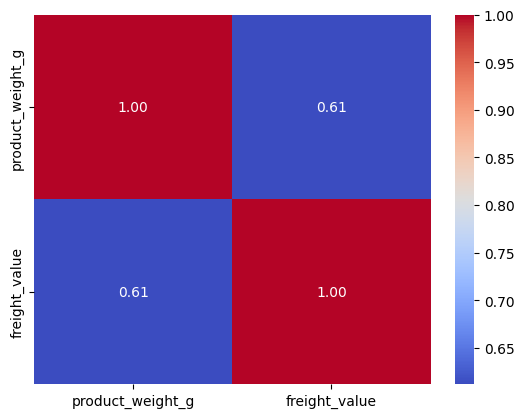

In [64]:
# Create a scatter plot using Plotly Express
fig = px.scatter(df, x='product_weight_g', y='freight_value', title='Scatter Plot: Product Weight vs Freight Value')

# Calculate the correlation matrix
correlation_matrix = df[['product_weight_g', 'freight_value']].corr()

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
fig.show()

**there is moderate correlation (61%) between the product weight and product freight value**

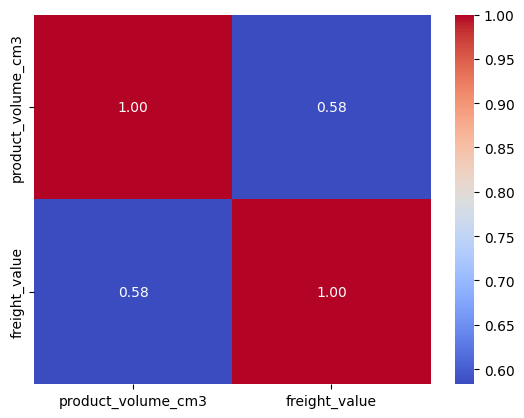

In [62]:
# Create a scatter plot using Plotly Express
fig = px.scatter(df, x='product_volume_cm3', y='freight_value', title='Scatter Plot: Product Volume vs Freight Value')

# Calculate the correlation matrix
correlation_matrix = df[['product_volume_cm3', 'freight_value']].corr()

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
fig.show()

**there is moderate correlation (58%) between the product volume and product freight value**

In [43]:
df.head()

product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 53.0                      2235.0                 3.0   
2                 50.0                       260.0                 2.0   
3                 53.0                      2235.0                 3.0   
4                 44.0                       749.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1            1450.0               20.0               25.0              20.0   
2             183.0               16.0                8.0              13.0   
3            1500.0               20.0               25.0              20.0   
4             500.0               16.0               14.0              14.0   

  product_category_name_english  order_item_id shipping_limit_date   price  \
0                     perfumery              1 2018-04-30 17:33:54   10.91   
1                     perfumery              1 2018-07-06 19:31:03  268.38   
2                     perfumery              1 2018-04-27 19:31:35    7.65   
3                     perfumery              1 2018-08-01 16:35:17  268.38   
4                     perfumery              1 2018-06-20 21:58:24   16.88   

   freight_value  payment_sequential payment_type  payment_installments  \
0           7.39                   1   debit_card                     1   
1          21.07                   1  credit_card                    10   
2          10.55                   1  credit_card                     2   
3          18.07                   1  credit_card                     8   
4           7.39                   1  credit_card                     1   

   payment_value order_status order_purchase_timestamp    order_approved_at  \
0          18.30    delivered      2018-04-24 16:16:53  2018-04-24 19:04:19   
1         289.45    delivered      2018-07-04 18:39:28  2018-07-05 16:33:14   
2          57.75    delivered      2018-04-23 19:03:35  2018-04-24 19:17:45   
3         286.45    delivered      2018-07-29 20:50:22  2018-07-30 18:31:13   
4          24.27    delivered      2018-06-18 21:46:34  2018-06-18 21:58:24   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2018-04-25 17:01:00           2018-04-27 16:42:17   
1          2018-07-05 13:21:00           2018-07-10 22:34:39   
2          2018-04-24 16:22:36           2018-04-25 23:02:39   
3          2018-08-01 15:24:00           2018-08-06 18:36:46   
4          2018-06-19 15:10:00           2018-06-20 19:22:15   

  order_estimated_delivery_date  review_score review_creation_date  \
0                    2018-05-09             5           2018-04-28   
1                    2018-07-27             4           2018-07-11   
2                    2018-05-15             5           2018-04-26   
3                    2018-08-15             3           2018-08-07   
4                    2018-06-28             4           2018-06-21   

  review_answer_timestamp  seller_zip_code_prefix seller_city seller_state  \
0     2018-05-04 00:55:02                    3694   sao paulo           SP   
1     2018-07-15 21:32:04                    3694   sao paulo           SP   
2     2018-04-30 21:15:06                    3694   sao paulo           SP   
3     2018-08-07 22:56:38                    3694   sao paulo           SP   
4     2018-06-22 12:12:26                    3694   sao paulo           SP   

   product_volume_cm3  
0              2240.0  
1             10000.0  
2              1664.0  
3             10000.0  
4              3136.0

# drop unnecessary columns for prediction

In [44]:
df.drop(['product_name_lenght','product_description_lenght','shipping_limit_date','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','review_creation_date','review_answer_timestamp','seller_zip_code_prefix'],axis=1,inplace=True)

In [45]:
df.head()

product_photos_qty  product_weight_g  product_length_cm  product_height_cm  \
0                 1.0             225.0               16.0               10.0   
1                 3.0            1450.0               20.0               25.0   
2                 2.0             183.0               16.0                8.0   
3                 3.0            1500.0               20.0               25.0   
4                 1.0             500.0               16.0               14.0   

   product_width_cm product_category_name_english  order_item_id   price  \
0              14.0                     perfumery              1   10.91   
1              20.0                     perfumery              1  268.38   
2              13.0                     perfumery              1    7.65   
3              20.0                     perfumery              1  268.38   
4              14.0                     perfumery              1   16.88   

   freight_value  payment_sequential payment_type  payment_installments  \
0           7.39                   1   debit_card                     1   
1          21.07                   1  credit_card                    10   
2          10.55                   1  credit_card                     2   
3          18.07                   1  credit_card                     8   
4           7.39                   1  credit_card                     1   

   payment_value order_status order_purchase_timestamp  review_score  \
0          18.30    delivered      2018-04-24 16:16:53             5   
1         289.45    delivered      2018-07-04 18:39:28             4   
2          57.75    delivered      2018-04-23 19:03:35             5   
3         286.45    delivered      2018-07-29 20:50:22             3   
4          24.27    delivered      2018-06-18 21:46:34             4   

  seller_city seller_state  product_volume_cm3  
0   sao paulo           SP              2240.0  
1   sao paulo           SP             10000.0  
2   sao paulo           SP              1664.0  
3   sao paulo           SP             10000.0  
4   sao paulo           SP              3136.0

# extract day & month and year from the data

In [46]:
df['day']=df['order_purchase_timestamp'].dt.day
df['month']=df['order_purchase_timestamp'].dt.month
df['year']=df['order_purchase_timestamp'].dt.year

In [47]:
df=df.drop(['order_purchase_timestamp','order_status'],axis=1)
df.head()

product_photos_qty  product_weight_g  product_length_cm  product_height_cm  \
0                 1.0             225.0               16.0               10.0   
1                 3.0            1450.0               20.0               25.0   
2                 2.0             183.0               16.0                8.0   
3                 3.0            1500.0               20.0               25.0   
4                 1.0             500.0               16.0               14.0   

   product_width_cm product_category_name_english  order_item_id   price  \
0              14.0                     perfumery              1   10.91   
1              20.0                     perfumery              1  268.38   
2              13.0                     perfumery              1    7.65   
3              20.0                     perfumery              1  268.38   
4              14.0                     perfumery              1   16.88   

   freight_value  payment_sequential payment_type  payment_installments  \
0           7.39                   1   debit_card                     1   
1          21.07                   1  credit_card                    10   
2          10.55                   1  credit_card                     2   
3          18.07                   1  credit_card                     8   
4           7.39                   1  credit_card                     1   

   payment_value  review_score seller_city seller_state  product_volume_cm3  \
0          18.30             5   sao paulo           SP              2240.0   
1         289.45             4   sao paulo           SP             10000.0   
2          57.75             5   sao paulo           SP              1664.0   
3         286.45             3   sao paulo           SP             10000.0   
4          24.27             4   sao paulo           SP              3136.0   

   day  month  year  
0   24      4  2018  
1    4      7  2018  
2   23      4  2018  
3   29      7  2018  
4   18      6  2018

# converting categorical columns to numerical by label encoder

In [48]:
from sklearn.preprocessing import LabelEncoder

# Define the columns to be encoded
columns_to_encode = ['product_category_name_english', 'payment_type', 'seller_city', 'seller_state']

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Iterate over the columns and apply LabelEncoder
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Display the updated DataFrame
df

product_photos_qty  product_weight_g  product_length_cm  \
0                      1.0             225.0               16.0   
1                      3.0            1450.0               20.0   
2                      2.0             183.0               16.0   
3                      3.0            1500.0               20.0   
4                      1.0             500.0               16.0   
...                    ...               ...                ...   
115604                 3.0             550.0               16.0   
115605                 4.0            1850.0               41.0   
115606                 4.0            1950.0               41.0   
115607                 2.0            2500.0               41.0   
115608                 2.0            2500.0               41.0   

        product_height_cm  product_width_cm  product_category_name_english  \
0                    10.0              14.0                             59   
1                    25.0              20.0                             59   
2                     8.0              13.0                             59   
3                    25.0              20.0                             59   
4                    14.0              14.0                             59   
...                   ...               ...                            ...   
115604               25.0              16.0                             35   
115605               21.0              21.0                             41   
115606               21.0              21.0                             41   
115607               21.0              21.0                             41   
115608               21.0              21.0                             41   

        order_item_id   price  freight_value  payment_sequential  \
0                   1   10.91           7.39                   1   
1                   1  268.38          21.07                   1   
2                   1    7.65          10.55                   1   
3                   1  268.38          18.07                   1   
4                   1   16.88           7.39                   1   
...               ...     ...            ...                 ...   
115604              1   30.00          17.14                   1   
115605              1  249.00          17.18                   1   
115606              1  249.00          39.29                   1   
115607              1  249.00           9.33                   2   
115608              1  249.00           9.33                   1   

        payment_type  payment_installments  payment_value  review_score  \
0                  2                     1          18.30             5   
1                  1                    10         289.45             4   
2                  1                     2          57.75             5   
3                  1                     8         286.45             3   
4                  1                     1          24.27             4   
...              ...                   ...            ...           ...   
115604             0                     1          47.14             5   
115605             1                     3         266.18             1   
115606             1                     2         288.29             1   
115607             1                     5         129.16             5   
115608             1                     5         129.17             5   

        seller_city  seller_state  product_volume_cm3  day  month  year  
0               497            21              2240.0   24      4  2018  
1               497            21             10000.0    4      7  2018  
2               497            21              1664.0   23      4  2018  
3               497            21             10000.0   29      7  2018  
4               497            21              3136.0   18      6  2018  
...             ...           ...                 ...  ...    ...   ...  
115604           59           

In [49]:
df.corr()

product_photos_qty  product_weight_g  \
product_photos_qty                       1.000000          0.022097   
product_weight_g                         0.022097          1.000000   
product_length_cm                        0.046097          0.458508   
product_height_cm                       -0.034906          0.582986   
product_width_cm                         0.007073          0.505460   
product_category_name_english            0.112251         -0.008570   
order_item_id                           -0.054462         -0.002261   
price                                    0.052891          0.341393   
freight_value                            0.022367          0.611866   
payment_sequential                      -0.008298          0.025287   
payment_type                            -0.004600          0.008246   
payment_installments                    -0.001583          0.179656   
payment_value                            0.010134          0.308161   
review_score                             0.021172         -0.026894   
seller_city                              0.109086         -0.070912   
seller_state                             0.029359         -0.025683   
product_volume_cm3                       0.010264          0.804884   
day                                     -0.000981         -0.001132   
month                                    0.010902         -0.009884   
year                                    -0.005172         -0.021486   

                               product_length_cm  product_height_cm  \
product_photos_qty                      0.046097          -0.034906   
product_weight_g                        0.458508           0.582986   
product_length_cm                       1.000000           0.188631   
product_height_cm                       0.188631           1.000000   
product_width_cm                        0.535033           0.275359   
product_category_name_english          -0.109119           0.077771   
order_item_id                           0.007958           0.029035   
price                                   0.142564           0.223758   
freight_value                           0.303105           0.391822   
payment_sequential                      0.029793           0.020086   
payment_type                            0.015125           0.002334   
payment_installments                    0.116407           0.121076   
payment_value                           0.139568           0.216368   
review_score                           -0.020080          -0.023240   
seller_city                            -0.100241          -0.047345   
seller_state                            0.031982           0.000996   
product_volume_cm3                      0.539030           0.722827   
day                                    -0.008059          -0.002343   
month                                  -0.005327           0.011707   
year                                   -0.050471          -0.025015   

                               product_width_cm  \
product_photos_qty                     0.007073   
product_weight_g                       0.505460   
product_length_cm                      0.535033   
product_height_cm                      0.275359   
product_width_cm                       1.000000   
product_category_name_english         -0.172697   
order_item_id                         -0.009857   
price                                  0.173024   
freight_value                          0.322015   
payment_sequential                     0.029570   
payment_type                           0.024654   
payment_installments                   0.137528   
payment_value                          0.148353   
review_score                          -0.011835   
seller_city                           -0.081241   
seller_state                           0.006396   
product_volume_cm3                     0.622754   
day                                    0.000271   
month                                  0.000826   
year                       

<Axes: >

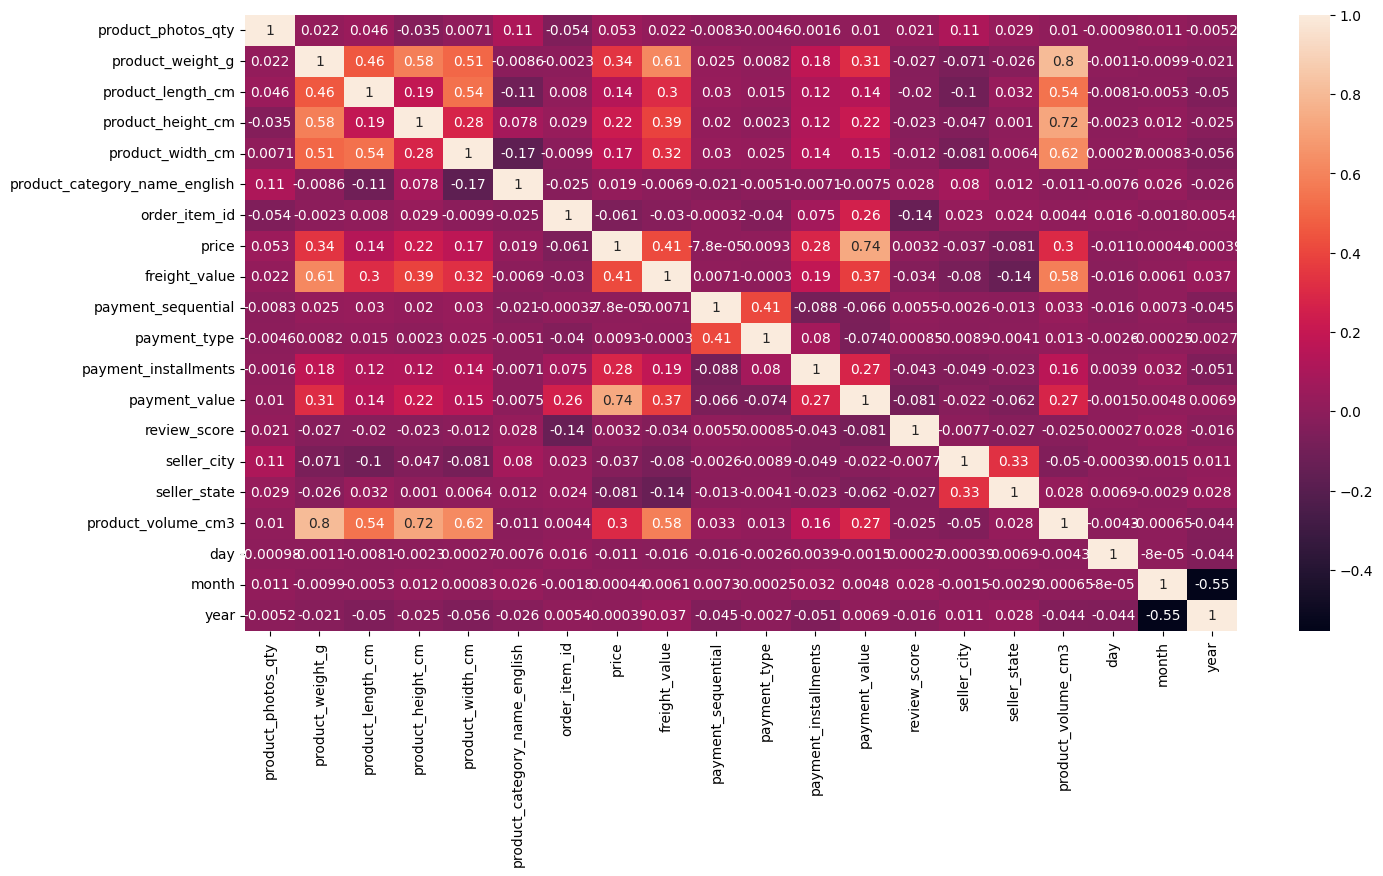

In [50]:
fig=plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

# Freight Value Prediction

In [51]:
df.columns

Index(['product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'order_item_id', 'price',
       'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_score', 'seller_city',
       'seller_state', 'product_volume_cm3', 'day', 'month', 'year'],
      dtype='object')

# extract the columns that have a correlation with freight value to use them in prediction

In [52]:
df_predict=df[['product_weight_g','product_length_cm','product_height_cm','product_width_cm','price','product_volume_cm3','payment_value','freight_value']]

In [53]:
df_predict

product_weight_g  product_length_cm  product_height_cm  \
0                  225.0               16.0               10.0   
1                 1450.0               20.0               25.0   
2                  183.0               16.0                8.0   
3                 1500.0               20.0               25.0   
4                  500.0               16.0               14.0   
...                  ...                ...                ...   
115604             550.0               16.0               25.0   
115605            1850.0               41.0               21.0   
115606            1950.0               41.0               21.0   
115607            2500.0               41.0               21.0   
115608            2500.0               41.0               21.0   

        product_width_cm   price  product_volume_cm3  payment_value  \
0                   14.0   10.91              2240.0          18.30   
1                   20.0  268.38             10000.0         289.45   
2                   13.0    7.65              1664.0          57.75   
3                   20.0  268.38             10000.0         286.45   
4                   14.0   16.88              3136.0          24.27   
...                  ...     ...                 ...            ...   
115604              16.0   30.00              6400.0          47.14   
115605              21.0  249.00             18081.0         266.18   
115606              21.0  249.00             18081.0         288.29   
115607              21.0  249.00             18081.0         129.16   
115608              21.0  249.00             18081.0         129.17   

        freight_value  
0                7.39  
1               21.07  
2               10.55  
3               18.07  
4                7.39  
...               ...  
115604          17.14  
115605          17.18  
115606          39.29  
115607           9.33  
115608           9.33  

[113193 rows x 8 columns]

In [54]:
X=df_predict.drop('freight_value',axis=1)
y=df_predict['freight_value']

# split the data into train and test 

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [56]:
print(X_train.shape)
print(X_test.shape)

(90554, 7)
(22639, 7)


# Using Random Forest Regressor in Freight Value Prediction

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
RFR=RandomForestRegressor(n_estimators=500,max_depth=50)
RFR.fit(X_train,y_train)
y_predict=RFR.predict(X_test)
print(mean_absolute_error(y_predict,y_test))

2.1945756637771745


# Using XGBoost Regressor in Freight Value Prediction

In [58]:
import xgboost as xgb
# Instantiate the XGBoost regressor 
model = xgb.XGBRegressor(n_estimators=700,learning_rate=.7,max_depth=50)  

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict using the trained model
prediction = model.predict(X_test)
print(mean_absolute_error(y_test, prediction))

2.2246526231404524


# Comparing between actual and prediction value by random forest regressor and xgboost regressor to choose the best prediction algorithm.

In [59]:
pred_df=pd.DataFrame(y_predict,index=X_test.index,columns=['prediction'])
# Merge the predicted values with the actual test data
merged_df = pd.concat([y_test,pred_df], axis=1)
merged_df=merged_df.rename({'freight_value':'actual'},axis=1)
merged_df

actual  prediction
37354    41.06    30.38832
105450   11.73    12.40778
7299     14.37    14.37000
109759    8.21    12.21136
93993    19.89    19.89310
...        ...         ...
93281    57.99    70.74128
13843     8.40     7.82950
29420    35.14    38.70632
43779    20.00    19.99990
60667    13.02    13.10706

[22639 rows x 2 columns]

In [60]:
pred_df=pd.DataFrame(prediction,index=X_test.index,columns=['prediction'])
# Merge the predicted values with the actual test data
merged_df = pd.concat([y_test,pred_df], axis=1)
merged_df=merged_df.rename({'freight_value':'actual'},axis=1)
merged_df

actual  prediction
37354    41.06   43.690380
105450   11.73   11.730110
7299     14.37   14.370129
109759    8.21    8.209795
93993    19.89   19.881479
...        ...         ...
93281    57.99   58.590672
13843     8.40    7.743983
29420    35.14   41.904274
43779    20.00   19.999966
60667    13.02   13.019761

[22639 rows x 2 columns]

# as we see the xgboost regressor is more accurate than random forest regreesor